In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime
import datetime as dt
import time

In [125]:
tickers = ['SPY', 'TLT']

In [126]:
start_date = "2000-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")

# Download historical data from yf API
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

# download data to csv
# data.to_csv("SPY-TLT-D-2000-01-01_2025-10-23.csv")

[*********************100%***********************]  2 of 2 completed


In [127]:
# Load the CSV with MultiIndex columns (Tickers, OHLCV)
df = pd.read_csv("SPY-TLT-D-2000-01-01_2025-10-23.csv", header=[0,1], index_col=0)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# Convert all values to float
df = df.astype(float)

# keep rows from 644 since TLT started trading on 2002-07-30
df = df.iloc[644:]

# keep only Close prices from level1
df = df.xs('Close', level=1, axis=1)

# lowercase column names
df.columns = [col.lower() for col in df.columns]

# date index to datetime and normalize to remove time component
df.index = pd.to_datetime(df.index)
df.index = df.index.normalize()
df = df.sort_index()

# DatetimeIndex to lowercase column
df.index.name = 'date'

# add year, month, day columns
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

# drop first two rows since there are only two business days for the month of July 2002
df = df.iloc[2:]

# Show the result
df.head()

,spy,tlt,year,month,day
date,,,,,
2002-08-01,57.772152,37.728413,2002,8,1
2002-08-02,56.477234,38.114819,2002,8,2
2002-08-05,54.511993,38.283016,2002,8,5
2002-08-06,56.347046,37.955715,2002,8,6
2002-08-07,57.329651,38.046638,2002,8,7


In [128]:
# add pct change column for each ticker (simple_returns)
df['spy_pct_change'] = df['spy'].pct_change()
df['tlt_pct_change'] = df['tlt'].pct_change()

# fill na values with 0
df = df.fillna(0)

# add cumsum_simple for each ticker (cumsum_simple)
df['spy_cumsum_simple'] = df['spy_pct_change'].cumsum()
df['tlt_cumsum_simple'] = df['tlt_pct_change'].cumsum()

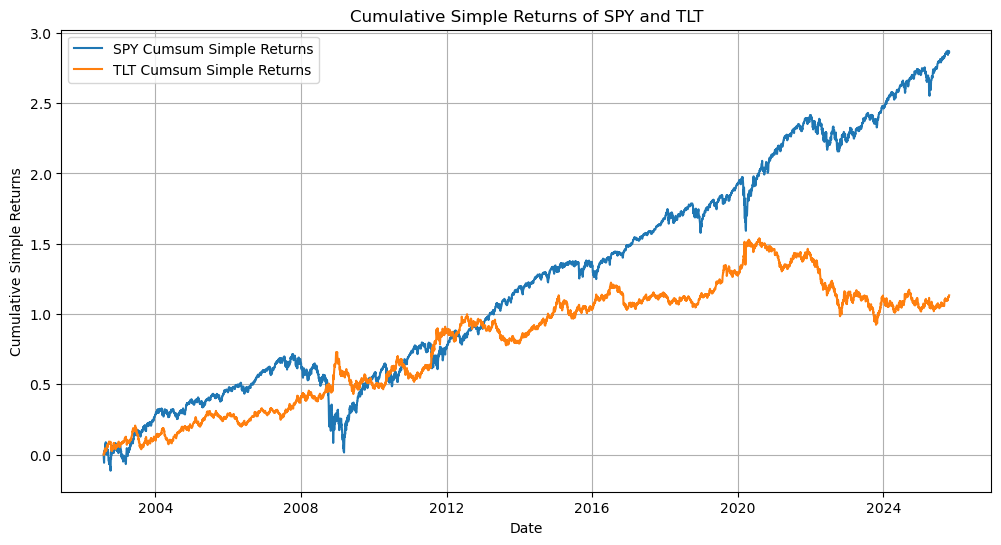

In [129]:
#  plot spy_cumsum_simple and tlt_cumsum_simple to check data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['spy_cumsum_simple'], label='SPY Cumsum Simple Returns')
plt.plot(df.index, df['tlt_cumsum_simple'], label='TLT Cumsum Simple Returns')
plt.title('Cumulative Simple Returns of SPY and TLT')
plt.xlabel('Date')
plt.ylabel('Cumulative Simple Returns')
plt.legend()
plt.grid()
plt.show()

In [130]:
# add difference column between spy_pct_change and tlt_pct_change
df['pct_change_diff'] = df['spy_pct_change'] - df['tlt_pct_change']

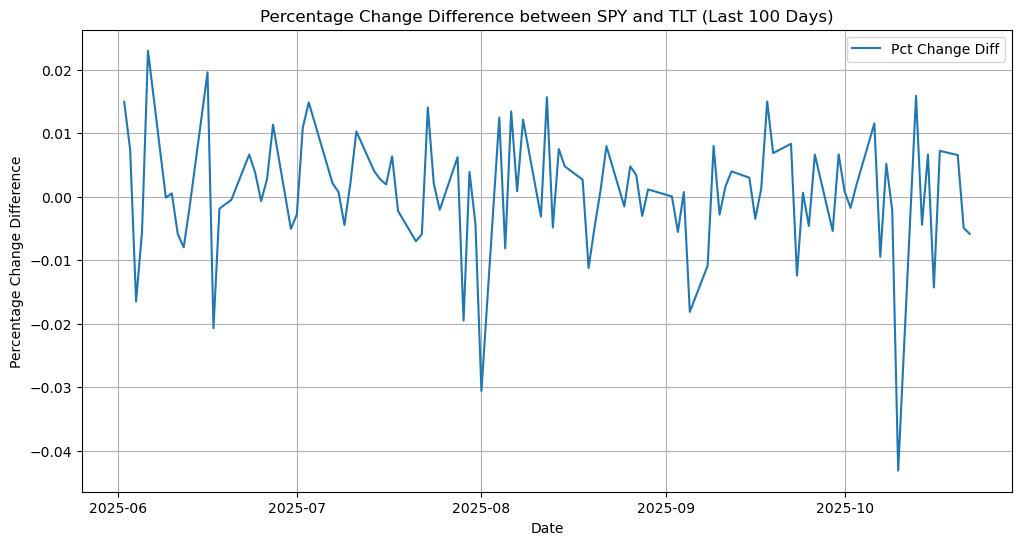

In [131]:
# plot pct_change_diff to check data (last 100 days)
plt.figure(figsize=(12, 6))
plt.plot(df.index[-100:], df['pct_change_diff'].iloc[-100:], label='Pct Change Diff')
plt.title('Percentage Change Difference between SPY and TLT (Last 100 Days)')
plt.xlabel('Date')
plt.ylabel('Percentage Change Difference')
plt.legend()
plt.grid()
plt.show()

In [ ]:
"""
For every month, there are on average 21 trading days.
For every year, there are on average 252 trading days.

We will split the month up into the first 15 business days.

Then, the remaining N minus 15 business days.
(where N is the total number of business days in that month) will form the second half of the month.

Additionally, we will add the first 5 days of the next month.

For the first 15 days, the last N minus 15 days and the first 5 days of the next month, 
we will calculate the _cumsum_simple of the two tickers and their difference.

""";

In [132]:
df.head()

,spy,tlt,year,month,day,spy_pct_change,tlt_pct_change,spy_cumsum_simple,tlt_cumsum_simple,pct_change_diff
date,,,,,,,,,,
2002-08-01,57.772152,37.728413,2002,8,1,0.000000,0.000000,0.000000,0.000000,0.000000
2002-08-02,56.477234,38.114819,2002,8,2,-0.022414,0.010242,-0.022414,0.010242,-0.032656
2002-08-05,54.511993,38.283016,2002,8,5,-0.034797,0.004413,-0.057211,0.014655,-0.039210
2002-08-06,56.347046,37.955715,2002,8,6,0.033663,-0.008550,-0.023548,0.006105,0.042213
2002-08-07,57.329651,38.046638,2002,8,7,0.017438,0.002396,-0.006110,0.008501,0.015043


In [133]:
# Show the result
df.tail(10)

,spy,tlt,year,month,day,spy_pct_change,tlt_pct_change,spy_cumsum_simple,tlt_cumsum_simple,pct_change_diff
date,,,,,,,,,,
2025-10-09,671.159973,89.180000,2025,10,9,-0.002897,-0.000784,2.869231,1.101124,-0.002113
2025-10-10,653.020020,90.620003,2025,10,10,-0.027028,0.016147,2.842204,1.117272,-0.043175
2025-10-13,663.039978,90.570000,2025,10,13,0.015344,-0.000552,2.857548,1.116720,0.015896
2025-10-14,662.229980,90.860001,2025,10,14,-0.001222,0.003202,2.856326,1.119922,-0.004424
2025-10-15,665.169983,90.660004,2025,10,15,0.004440,-0.002201,2.860766,1.117721,0.006641
2025-10-16,660.640015,91.339996,2025,10,16,-0.006810,0.007500,2.853955,1.125221,-0.014311
2025-10-17,664.390015,91.199997,2025,10,17,0.005676,-0.001533,2.859632,1.123688,0.007209
2025-10-20,671.299988,91.550003,2025,10,20,0.010400,0.003838,2.870032,1.127526,0.006563
2025-10-21,671.289978,92.000000,2025,10,21,-0.000015,0.004915,2.870017,1.132441,-0.004930


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5845 entries, 2002-08-01 to 2025-10-22
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   spy                5845 non-null   float64
 1   tlt                5845 non-null   float64
 2   year               5845 non-null   int32  
 3   month              5845 non-null   int32  
 4   day                5845 non-null   int32  
 5   spy_pct_change     5845 non-null   float64
 6   tlt_pct_change     5845 non-null   float64
 7   spy_cumsum_simple  5845 non-null   float64
 8   tlt_cumsum_simple  5845 non-null   float64
 9   pct_change_diff    5845 non-null   float64
dtypes: float64(7), int32(3)
memory usage: 433.8 KB
